In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
import xgboost as xgb


In [11]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/final_internship_data.csv')
df.head()


,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [17]:
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358361,-1.265712,0.696740,-1.265755,0.696675,1.683428,13.510834,15.684206,6.268650,3.042008,2011.739132,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
std,9.916617,0.206941,0.140909,0.205903,0.128997,1.307395,6.511571,8.681066,3.437815,1.949240,1.860889,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548
min,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


In [18]:
df.isnull().sum()
df_clean = df.dropna()


In [63]:
df_clean = df.dropna()
df_clean = df_clean[df_clean['fare_amount'].between(2, 200)]

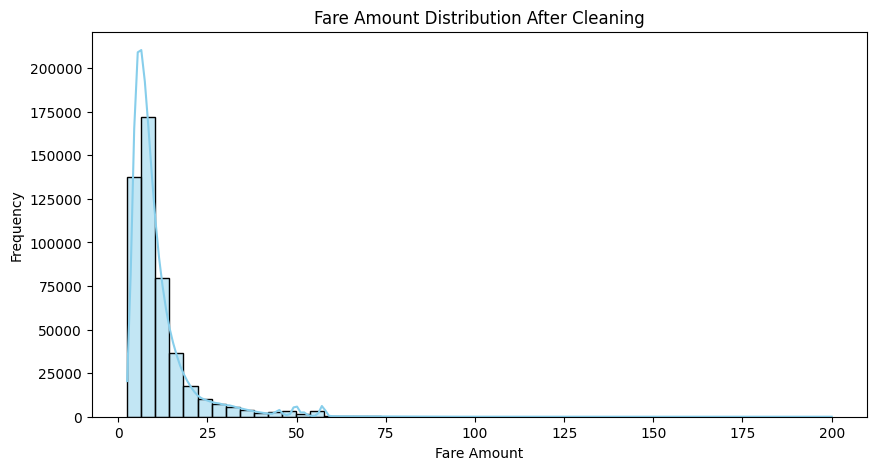

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df_clean['fare_amount'], bins=50, kde=True, color='skyblue')
plt.title('Fare Amount Distribution After Cleaning')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()



In [46]:
features = ['distance', 'hour', 'weekday', 'Weather', 'Car Condition', 'Traffic Condition']
target = 'fare_amount'

X = df_clean[features]
y = df_clean[target]


In [57]:
numeric_features = ['distance', 'hour', 'weekday']
categorical_features = ['Weather', 'Car Condition', 'Traffic Condition']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [58]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['distance', 'hour',
                                                   'weekday']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Weather', 'Car Condition',
                                                   'Traffic Condition'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [66]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² score:", r2)


MAE: 2.4468429306759454
MSE: 22.006578597861413
RMSE: 4.69111698829409
R² score: 0.7611734287412322


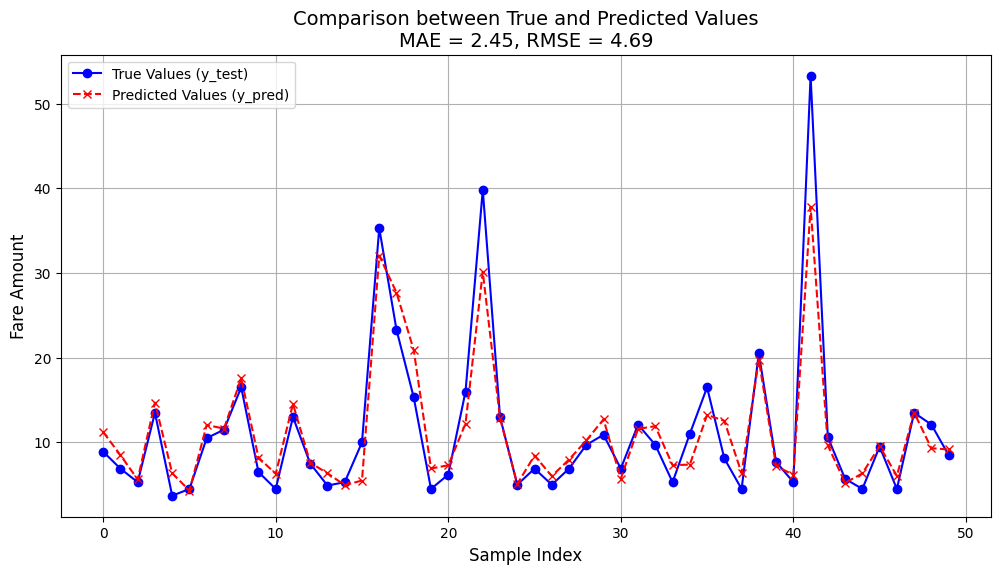

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values[:50], label='True Values (y_test)', marker='o', linestyle='-', color='blue')
plt.plot(y_pred[:50], label='Predicted Values (y_pred)', marker='x', linestyle='--', color='red')
plt.title(f'Comparison between True and Predicted Values\nMAE = {mae:.2f}, RMSE = {rmse:.2f}', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Fare Amount', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [55]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R² score:", r2)


R² score: 0.7611734287412322


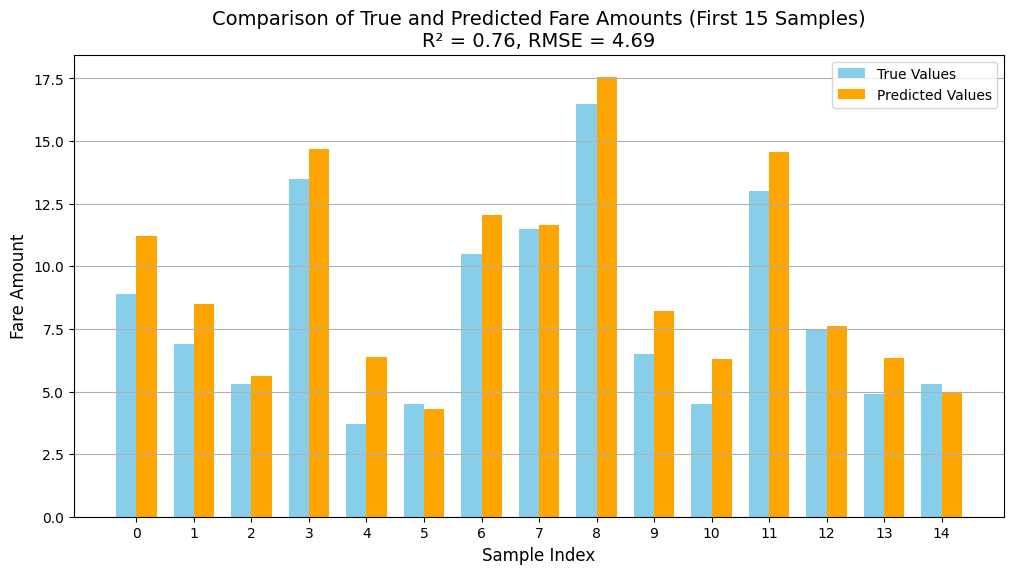

In [68]:
import numpy as np
import matplotlib.pyplot as plt

n_samples = 15

indices = np.arange(n_samples)
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(indices - width/2, y_test.values[:n_samples], width, label='True Values', color='skyblue')
plt.bar(indices + width/2, y_pred[:n_samples], width, label='Predicted Values', color='orange')

plt.title(f'Comparison of True and Predicted Fare Amounts (First {n_samples} Samples)\nR² = {r2:.2f}, RMSE = {rmse:.2f}', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Fare Amount', fontsize=12)
plt.xticks(indices)
plt.legend()
plt.grid(axis='y')
plt.show()
